# **Projek Machine Learning (Classification)**

## **Impoart Libarry Yang Digunakan**

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## **Memasukan dataset yang akan digunakan**

In [102]:
df_train = pd.read_csv('Data/kendaraan_train.csv')
del df_train['id']
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [103]:
df_train.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [104]:
df_train.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [105]:
df_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [106]:
#pengecekan data yang duplikat
df_train[df_train.duplicated()]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
24277,Pria,21.0,1.0,14.0,1.0,< 1 Tahun,Tidak,2630.0,160.0,202.0,0
38835,Wanita,23.0,1.0,41.0,1.0,< 1 Tahun,Tidak,NaN,152.0,NaN,0
40755,Wanita,69.0,1.0,1.0,1.0,1-2 Tahun,Tidak,2630.0,124.0,22.0,0
43123,Wanita,53.0,1.0,28.0,1.0,1-2 Tahun,Tidak,2630.0,124.0,143.0,0
43855,Pria,53.0,1.0,28.0,0.0,1-2 Tahun,Pernah,NaN,124.0,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...
279025,Wanita,26.0,1.0,15.0,0.0,< 1 Tahun,Tidak,NaN,152.0,236.0,0
279714,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,2630.0,160.0,NaN,0
281991,Pria,40.0,1.0,28.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,NaN,0
282117,Pria,40.0,1.0,48.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,152.0,0


In [107]:
#drop duplikat data
df_train.drop_duplicates(inplace=True)

In [108]:
#Melakukan Pengecekan apakah masih ada data yg duplikat atau tidak
df_train[df_train.duplicated()]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik


In [109]:
df_train.to_csv('Data/kendaraan_train_after_drop_duplicat.csv', index=False)

In [110]:
df_test = pd.read_csv('Data/kendaraan_test.csv')
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [111]:
df_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Data Prepocessing**

### **Mengubah Data String To integer**

In [112]:
#Fungsi ganti label string
def gantiLabelStringtoInteger(data):
    data['Jenis_Kelamin'] = data['Jenis_Kelamin'].replace(['Pria','Wanita'],[1,0])
    data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace(['Pernah','Tidak'],[1,0])
    data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace(['< 1 Tahun','1-2 Tahun','> 2 Tahun'],[0,1,2])

In [113]:
gantiLabelStringtoInteger(df_train)
print('Data Train Setelah Ganti Label String')
df_train.head()

Data Train Setelah Ganti Label String


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0


In [114]:
df_train_with_outlier = df_train
df_train_with_outlier

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [115]:
gantiLabelStringtoInteger(df_test)
print('Data Test Setelah Ganti Label String')
df_test.head()

Data Test Setelah Ganti Label String


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0


### **Analisis Distribusi Data Untuk Menentukan Handling Mising Value Menggunakan Mean/Modus/Median** 

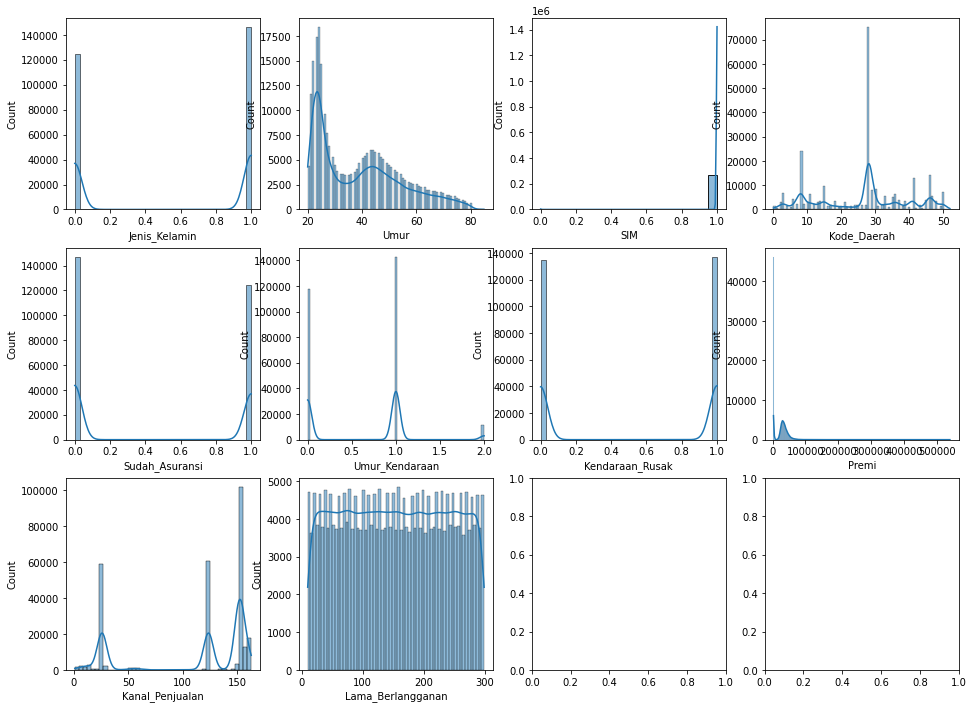

In [116]:
#melihat Distribusi data dengan melakukan visualisasi menggunakna histogram
fig, ax = plt.subplots(nrows= 3, ncols=4, figsize=(16,12))
sns.histplot(x="Jenis_Kelamin", data=df_train, kde=True, ax=ax[0,0])
sns.histplot(x="Umur", data=df_train, kde=True, ax=ax[0,1])
sns.histplot(x="SIM", data=df_train, kde=True, ax=ax[0,2])
sns.histplot(x="Kode_Daerah", data=df_train, kde=True, ax=ax[0,3])
sns.histplot(x="Sudah_Asuransi", data=df_train, kde=True, ax=ax[1,0])
sns.histplot(x="Umur_Kendaraan", data=df_train, kde=True, ax=ax[1,1])
sns.histplot(x="Kendaraan_Rusak", data=df_train, kde=True, ax=ax[1,2])
sns.histplot(x="Premi", data=df_train, kde=True, ax=ax[1,3])
sns.histplot(x="Kanal_Penjualan", data=df_train, kde=True, ax=ax[2,0])
sns.histplot(x="Lama_Berlangganan", data=df_train, kde=True, ax=ax[2,1])
plt.show()

#### Handling Mising Value untuk data tanpa outlier

In [117]:
#Menggunakna Mean Ketika data memiliki distribusi normal 
df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].mean(), inplace=True)

#Menggunakna Mode(modus) jika data kategorikal dan perbedaan hasilnya sangat jauh
col_mode = ['SIM','Kode_Daerah','Kanal_Penjualan']
for x in col_mode:
    df_train[x].fillna(df_train[x].mode()[0], inplace=True)
#Menggunakan Median jika distribusi data memiliki kemiringan(skewness)
col_median = ['Umur','Jenis_Kelamin','Umur_Kendaraan','Premi','Sudah_Asuransi','Kendaraan_Rusak']
for i in col_median:
    df_train[i].fillna(df_train[i].median(), inplace=True)

In [118]:

df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [119]:
df_train.to_csv('Data/kendaraan_train_clean_after_handling_missing_value.csv', index=False)

In [120]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


#### Handling Mising Value untuk data dengan outlier

In [121]:
#Menggunakna Mean Ketika data memiliki distribusi normal 
df_train_with_outlier['Lama_Berlangganan'].fillna(df_train_with_outlier['Lama_Berlangganan'].mean(), inplace=True)

#Menggunakna Mode(modus) jika data kategorikal dan perbedaan hasilnya sangat jauh
col_mode = ['SIM','Kode_Daerah','Kanal_Penjualan']
for x in col_mode:
    df_train_with_outlier[x].fillna(df_train_with_outlier[x].mode()[0], inplace=True)
#Menggunakan Median jika distribusi data memiliki kemiringan(skewness)
col_median = ['Umur','Jenis_Kelamin','Umur_Kendaraan','Premi','Sudah_Asuransi','Kendaraan_Rusak']
for i in col_median:
    df_train_with_outlier[i].fillna(df_train_with_outlier[i].median(), inplace=True)

In [122]:
df_train_with_outlier.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [123]:
df_train_with_outlier.to_csv('Data/kendaraan_train_clean_after_handling_missing_value_with_outlier.csv', index=False)

In [124]:
df_train_with_outlier

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


### **HANDLING OUTLIER**

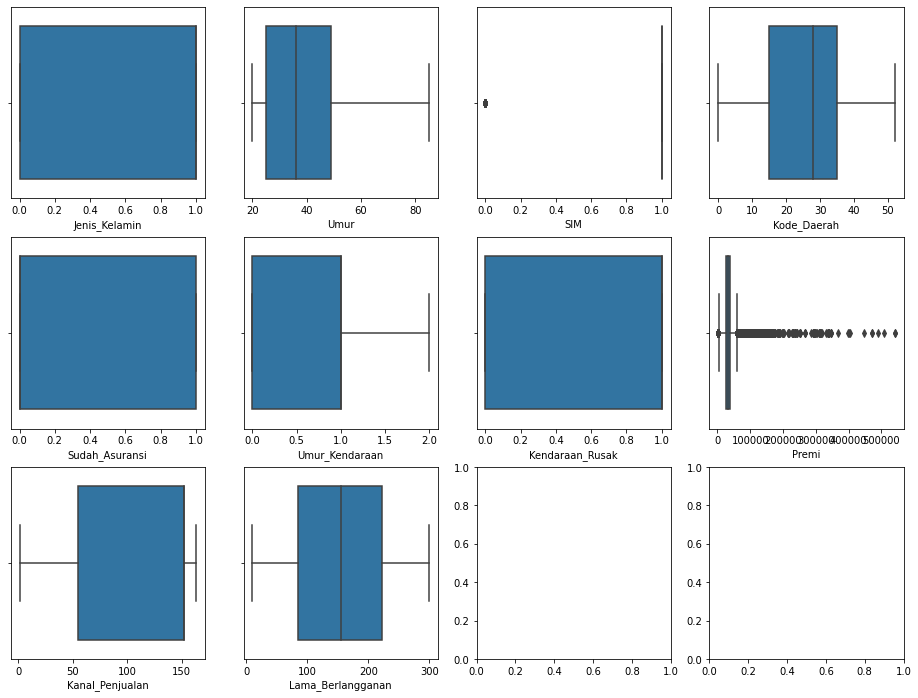

In [125]:
fig, ax = plt.subplots(nrows= 3, ncols=4, figsize=(16,12))
sns.boxplot(x="Jenis_Kelamin", data=df_train, ax=ax[0,0])
sns.boxplot(x="Umur", data=df_train, ax=ax[0,1])
sns.boxplot(x="SIM", data=df_train,  ax=ax[0,2])
sns.boxplot(x="Kode_Daerah", data=df_train, ax=ax[0,3])
sns.boxplot(x="Sudah_Asuransi", data=df_train,  ax=ax[1,0])
sns.boxplot(x="Umur_Kendaraan", data=df_train, ax=ax[1,1])
sns.boxplot(x="Kendaraan_Rusak", data=df_train, ax=ax[1,2])
sns.boxplot(x="Premi", data=df_train,  ax=ax[1,3])
sns.boxplot(x="Kanal_Penjualan", data=df_train,  ax=ax[2,0])
sns.boxplot(x="Lama_Berlangganan", data=df_train, ax=ax[2,1])
plt.show()

In [126]:
#Membuat pembersihaan outlier 
def outlier_detection(data_column):
    sorted(data_column)
    Q1 ,Q3 = np.percentile(data_column,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

**FORMULA DROP OUTLIER**

In [127]:
# Pembersihan data outlier premi
lowerbound, upperbound = outlier_detection(df_train['Premi'])
df_train = df_train[~((df_train['Premi']<lowerbound) | (df_train['Premi']>upperbound))]


\begin{align}
Data \in (x \ge Lowerbound) and (x \le Upperbound)
\end{align}


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premi'>

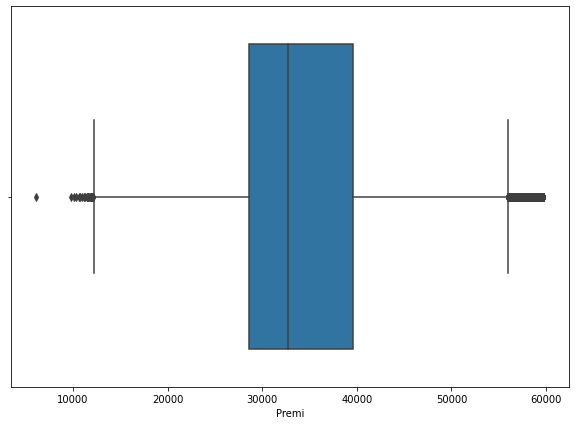

In [128]:
#Hasil Data Yang Telah Di bersihkan Outliernya 
fig = plt.figure(figsize=(10,7))
sns.boxplot(df_train['Premi'])

In [129]:
df_train.to_csv('Data/kendaraan_train_clean_after_handling_outlier.csv', index=False)

### **Normalisasi Data**

#### **Normalisasi With Outlier Handling**

In [130]:
# Melakukan Normalisasi Data Menggunakan minmax method
atribute = [
    'Jenis_Kelamin','Umur','Kode_Daerah', 'Sudah_Asuransi', 'Umur_Kendaraan',
    'Kendaraan_Rusak','Premi', 'Kanal_Penjualan', 'Lama_Berlangganan'
]
scaler =MinMaxScaler()
df_train_clean = scaler.fit_transform(df_train[atribute].values)
df_train_clean = pd.DataFrame(df_train_clean,columns=df_train[atribute].columns)
df_train_clean['Tertarik'] = df_train['Tertarik'].values
df_train_clean

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,0.634615,1.0,0.0,0.0,0.409000,0.932099,0.301038,0
1,1.0,0.430769,0.750000,0.0,1.0,1.0,0.367431,0.172840,0.512111,0
2,1.0,0.015385,0.884615,1.0,0.0,0.0,0.496727,0.981481,0.377163,0
3,1.0,0.461538,0.673077,0.0,1.0,1.0,0.536338,0.537037,0.636678,0
4,1.0,0.015385,0.673077,1.0,0.0,0.0,0.310270,0.932099,0.557093,0
...,...,...,...,...,...,...,...,...,...,...
230626,0.0,0.046154,0.076923,1.0,0.0,0.0,0.370937,0.932099,0.716263,0
230627,0.0,0.015385,0.884615,1.0,0.0,0.0,0.719643,0.932099,0.138408,0
230628,0.0,0.046154,0.961538,1.0,0.0,0.0,0.814103,0.932099,0.747405,0
230629,1.0,0.738462,0.134615,1.0,0.5,0.0,0.455139,0.759259,0.899654,0


#### **Normalisasi Without Outlier Handling**

In [131]:
df_train_clean_non_outlier_handling = scaler.fit_transform(df_train_with_outlier[atribute].values)
df_train_clean_non_outlier_handling = pd.DataFrame(df_train_clean_non_outlier_handling ,columns=df_train_with_outlier[atribute].columns)
df_train_clean_non_outlier_handling['Tertarik'] = df_train_with_outlier['Tertarik'].values
df_train_clean_non_outlier_handling

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0
1,1.0,0.430769,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0
2,1.0,0.015385,0.884615,1.0,0.0,0.0,0.056002,0.981481,0.377163,0
3,0.0,0.584615,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0
4,1.0,0.461538,0.673077,0.0,1.0,1.0,0.059953,0.537037,0.636678,0
...,...,...,...,...,...,...,...,...,...,...
285657,0.0,0.046154,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263,0
285658,0.0,0.015385,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408,0
285659,0.0,0.046154,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405,0
285660,1.0,0.738462,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654,0


#### **Normalisasi Data Test**

In [132]:
df_test_clean = scaler.fit_transform(df_test[atribute].values)
df_test_clean = pd.DataFrame(df_test_clean,columns=df_test[atribute].columns)
df_test_clean['Tertarik'] = df_test['Tertarik'].values
df_test_clean

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.446154,0.153846,0.0,0.5,1.0,0.082475,0.154321,0.467128,0
1,1.0,0.030769,0.903846,1.0,0.0,0.0,0.068822,0.932099,0.799308,0
2,1.0,0.061538,0.538462,1.0,0.0,0.0,0.200636,0.932099,0.179931,0
3,1.0,0.400000,0.153846,1.0,0.5,0.0,0.062575,0.759259,0.083045,0
4,1.0,0.230769,0.442308,0.0,0.5,1.0,0.045268,0.932099,0.757785,0
...,...,...,...,...,...,...,...,...,...,...
47634,1.0,0.630769,0.884615,0.0,1.0,1.0,0.052851,0.759259,0.197232,0
47635,1.0,0.323077,0.288462,0.0,0.5,1.0,0.000000,0.962963,0.768166,0
47636,1.0,0.061538,0.557692,1.0,0.0,0.0,0.056687,0.932099,0.695502,0
47637,1.0,0.600000,0.576923,0.0,0.5,1.0,0.065406,0.154321,0.792388,1


In [133]:
df_train_clean.to_csv('Data/kendaraan_train_clean.csv', index=False)
df_test_clean.to_csv('Data/kendaraan_test_clean.csv', index=False)
df_train_clean_non_outlier_handling.to_csv('Data/kendaraan_train_clean_with_outlier.csv', index=False)